<a href="https://colab.research.google.com/github/SANCHIT157/SANCHIT157/blob/main/movie_rating_prediction_sanchit_rout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size: 45px", align="center">
    <center>Codesoft Task2 </center>
</h1>
<h1 style="font-size: 50px", align="center">
    <center>IMDB Movies Rating Prediction</center>
</h1>

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14980 non-null  float64
 2   Duration  7241 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13124 non-null  object 
 9   Actor 3   12356 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [5]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14980.000000,7241,13632,7919.000000,7920,14984,13892,13124,12356
unique,13838,NaN,183,485,NaN,2035,5941,4718,4890,4815
top,Anjaam,NaN,120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,NaN,240,2780,NaN,227,58,158,83,91
mean,NaN,-1987.012350,NaN,NaN,5.842758,NaN,NaN,NaN,NaN,NaN
std,NaN,25.417532,NaN,NaN,1.384783,NaN,NaN,NaN,NaN,NaN
min,NaN,-2022.000000,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,-2009.000000,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,-1991.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,-1968.000000,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


# # Explorartory Data Analysis

**Missing Data**

In [6]:
df.isnull().sum()

Name           0
Year         529
Duration    8268
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2385
Actor 3     3153
dtype: int64

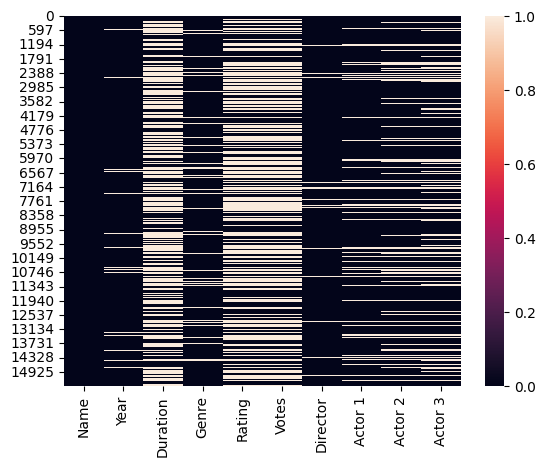

In [7]:
sns.heatmap(df.isnull());

In [8]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent],
                       axis=1,
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Duration,8268,53.31
Rating,7590,48.94
Votes,7589,48.93
Actor 3,3153,20.33
Actor 2,2385,15.38
Genre,1877,12.10
Actor 1,1617,10.43
Year,529,3.41
Director,525,3.39
Name,0,0.00


In [9]:
df.dropna(subset=['Rating'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    26.10
Actor 3      3.78
Actor 2      2.53
Actor 1      1.58
Genre        1.29
Director     0.06
Year         0.01
Name         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [10]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    25.14
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [11]:
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(7551, 10)

In [13]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7551 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7551 non-null   object 
 1   Year      7551 non-null   int64  
 2   Duration  7551 non-null   float64
 3   Genre     7551 non-null   object 
 4   Rating    7551 non-null   float64
 5   Votes     7551 non-null   int64  
 6   Director  7551 non-null   object 
 7   Actor 1   7551 non-null   object 
 8   Actor 2   7551 non-null   object 
 9   Actor 3   7551 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 648.9+ KB


In [14]:
df['Year'].unique()

array([-2019, -1997, -2005, -2012, -2014, -2004, -2016, -1991, -2018,
       -2010, -1958, -2021, -2017, -2009, -1993, -2002, -1946, -2008,
       -1994, -2007, -2013, -2003, -1998, -1979, -1974, -2015, -2006,
       -1981, -2020, -1985, -2011, -1988, -1995, -1987, -1999, -1973,
       -1968, -1953, -1986, -1982, -1977, -1950, -1969, -1948, -1967,
       -1970, -1990, -1989, -1947, -2001, -2000, -1971, -1978, -1944,
       -1963, -1992, -1976, -1984, -1975, -1980, -1966, -1972, -1956,
       -1960, -1964, -1952, -1959, -1951, -1954, -1962, -1961, -1957,
       -1965, -1996, -1933, -1955, -1983, -1936, -1949, -1940, -1945,
       -1938, -1941, -1942, -1932, -1935, -1937, -1931, -1943, -1917,
       -1939, -1934])

In [15]:
(df['Duration']>180).sum()

113

In [16]:
(df['Duration']<60).sum()

27

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7551 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7551 non-null   object 
 1   Year      7551 non-null   int64  
 2   Duration  7551 non-null   float64
 3   Genre     7551 non-null   object 
 4   Rating    7551 non-null   float64
 5   Votes     7551 non-null   int64  
 6   Director  7551 non-null   object 
 7   Actor 1   7551 non-null   object 
 8   Actor 2   7551 non-null   object 
 9   Actor 3   7551 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 648.9+ KB


In [18]:
df[['Rating', 'Duration', 'Votes']].describe(percentiles=[0.75,0.8, 0.9, 0.95, 0.98])

,Rating,Duration,Votes
count,7551.000000,7551.000000,7551.000000
mean,5.810621,133.471608,2030.323004
std,1.368374,21.888213,11874.080713
min,1.100000,21.000000,5.000000
50%,6.000000,133.471608,61.000000
75%,6.800000,144.000000,456.000000
80%,7.000000,149.000000,797.000000
90%,7.400000,160.000000,3185.000000
95%,7.800000,169.000000,8683.500000
98%,8.200000,180.000000,21938.000000


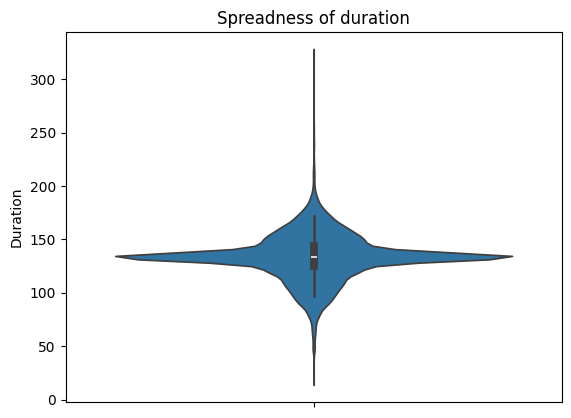

In [19]:
sns.violinplot(y=df['Duration'])
plt.title('Spreadness of duration')
plt.show()

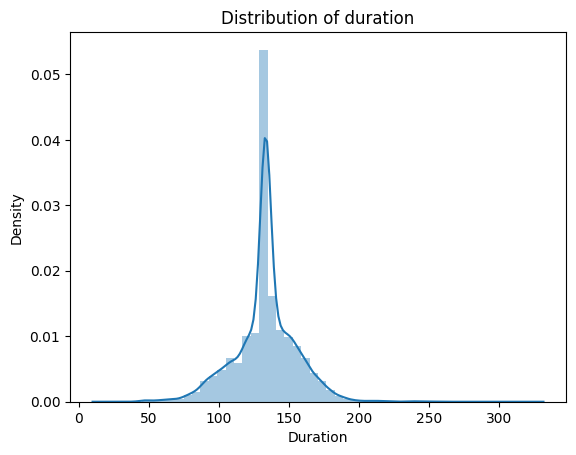

In [20]:
sns.distplot(df['Duration'])
plt.title('Distribution of duration')
plt.show()

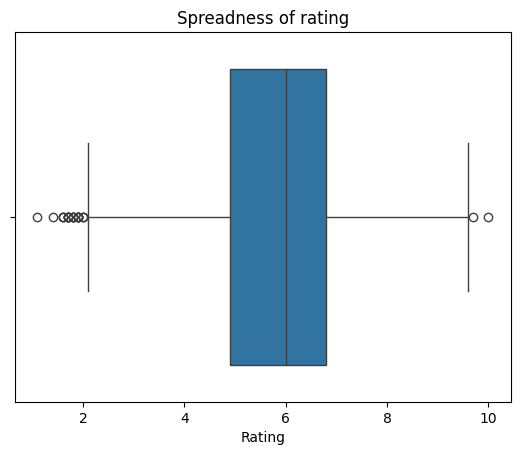

In [21]:
sns.boxplot(x=df['Rating'])
plt.title('Spreadness of rating')
plt.show()

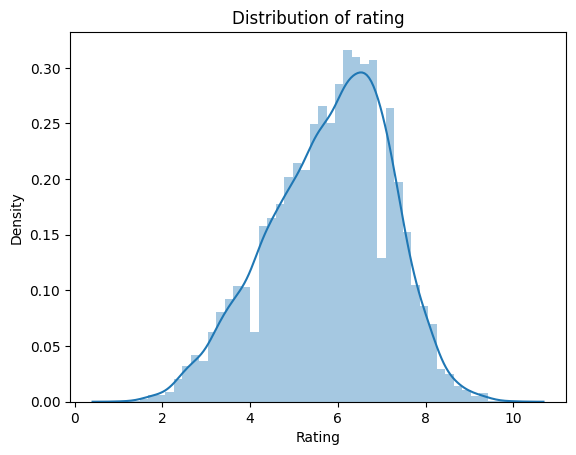

In [22]:
sns.distplot(df['Rating'])
plt.title('Distribution of rating')
plt.show()

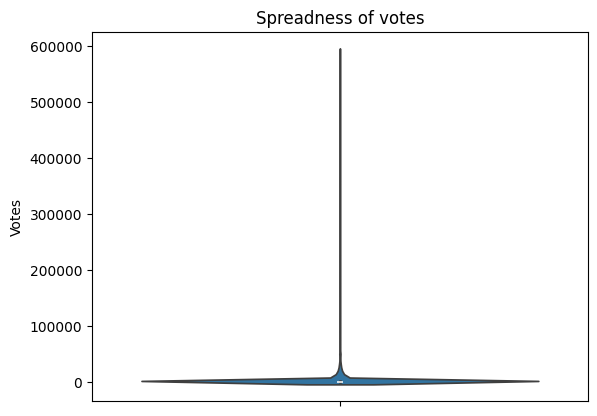

In [23]:
sns.violinplot(y=df['Votes'])
plt.title('Spreadness of votes')
plt.show()

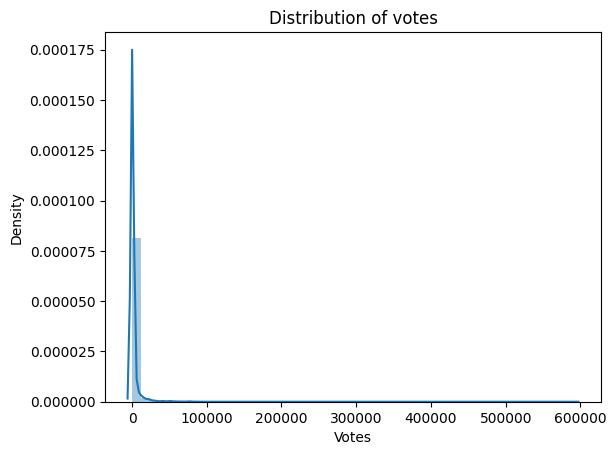

In [24]:
sns.distplot(df['Votes'])
plt.title('Distribution of votes')
plt.show()

In [25]:
df[df['Votes']>100000]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,-2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3410,Dangal,-2016,161.0,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
3829,Dil Bechara,-2020,101.0,"Comedy, Drama, Romance",6.6,117377,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid
4848,Gandhi,-1982,191.0,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
8035,Lagaan: Once Upon a Time in India,-2001,224.0,"Drama, Musical, Sport",8.1,107234,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh
8219,Life of Pi,-2012,127.0,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
8228,Like Stars on Earth,-2007,165.0,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
8233,Lion,-2016,118.0,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
9764,My Name Is Khan,-2010,165.0,Drama,8.0,101014,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon
10882,PK,-2014,153.0,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt


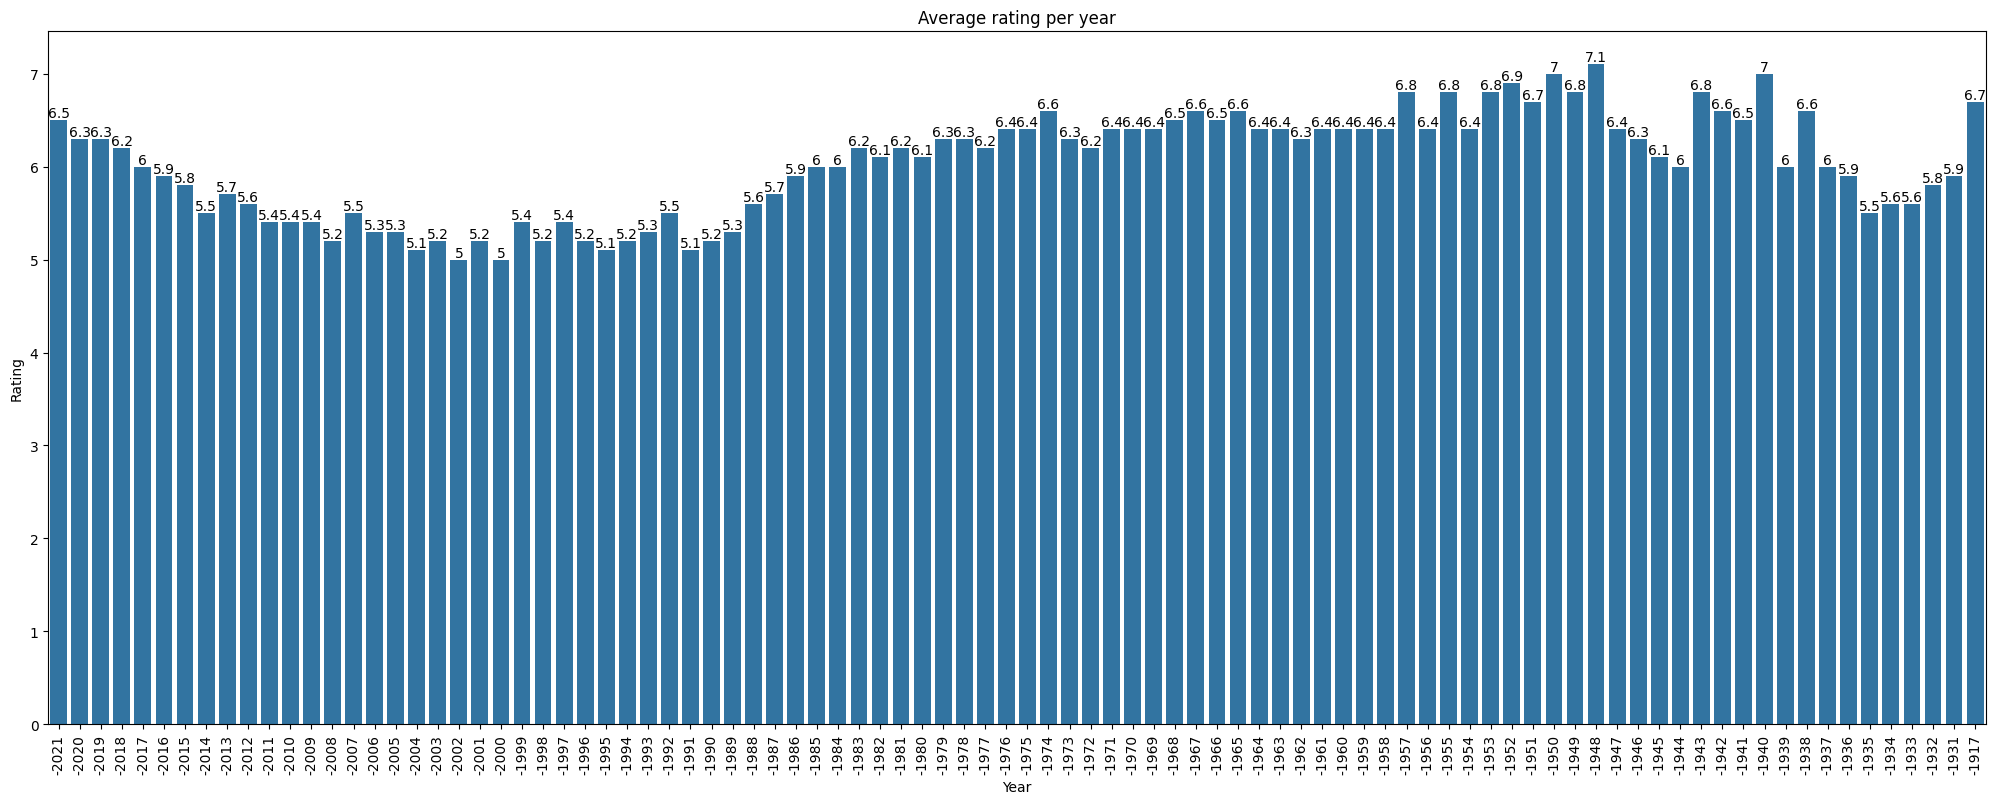

In [26]:
# Average rating per year
year_rating = df.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',
                                                                     ascending=False,
                                                                     )
year_rating['Rating'] = round(year_rating['Rating'],1)

plt.figure(figsize=(25,9))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()

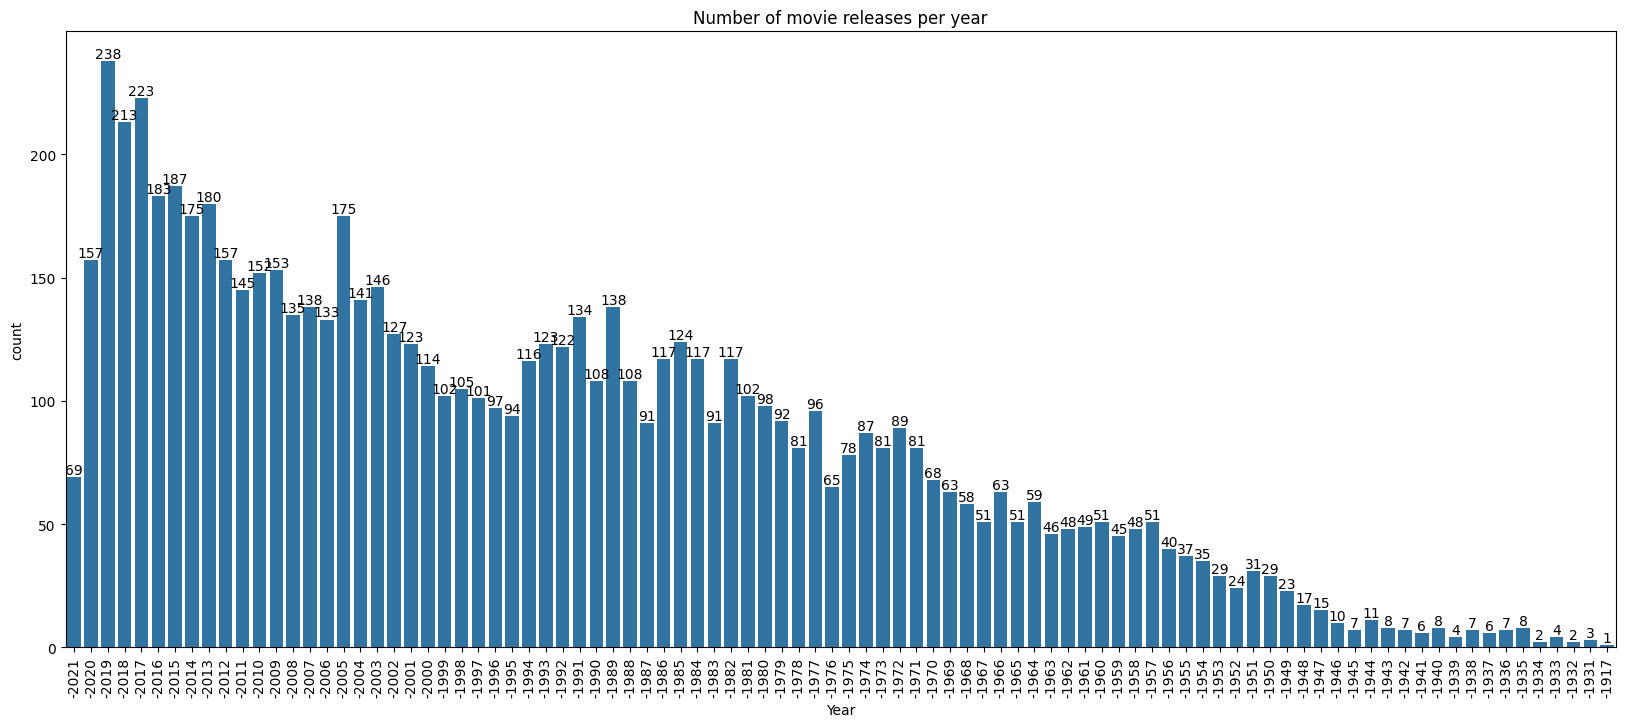

In [27]:
# Number of movie release per year
year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(20,8))
ax = sns.barplot(data=year_count, x='Year', y='count')
ax.bar_label(ax.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

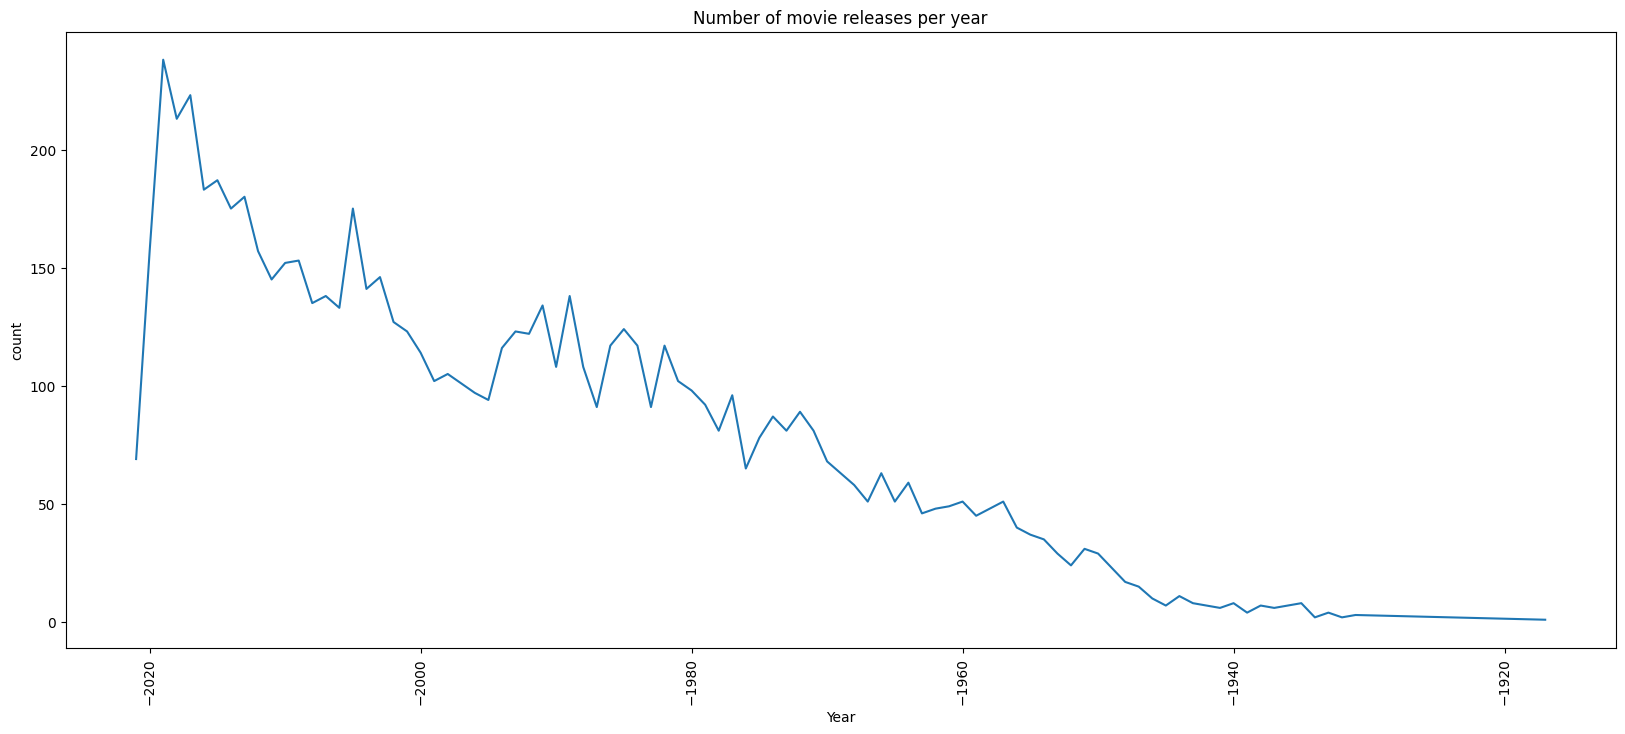

In [28]:
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=year_count, x='Year', y='count')
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

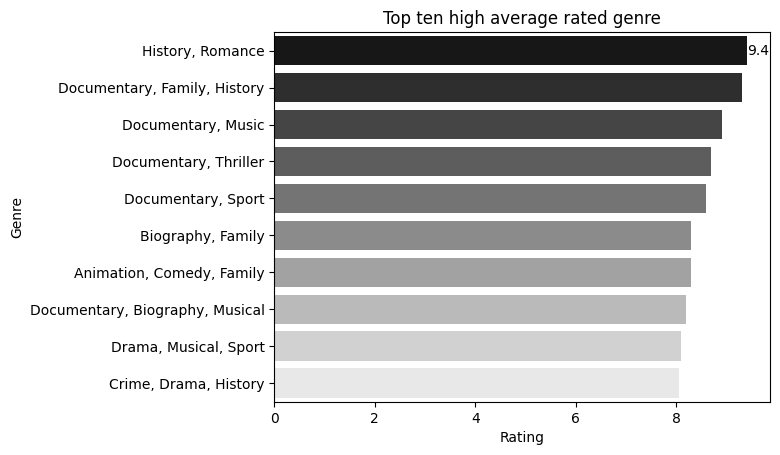

In [29]:
# plot top ten high average rated genre
genre_rate = df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

ax = sns.barplot(data=genre_rate, x='Rating', y='Genre', palette='gist_gray')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated genre')
plt.show()

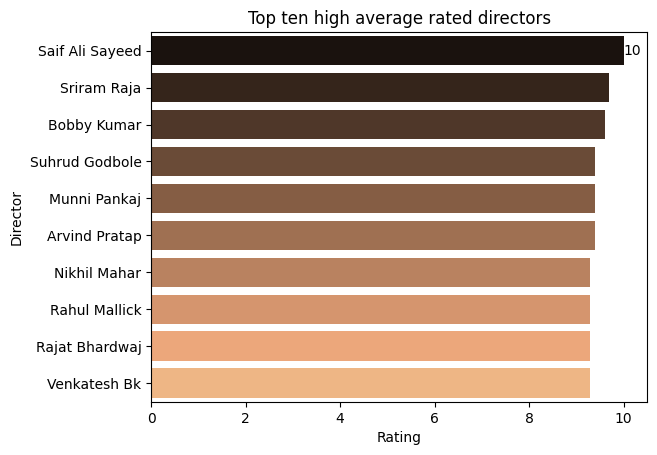

In [30]:
# plot top ten high average rating directors
director_rate = df.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

ax = sns.barplot(data=director_rate, x='Rating', y='Director', palette='copper')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated directors')
plt.show()

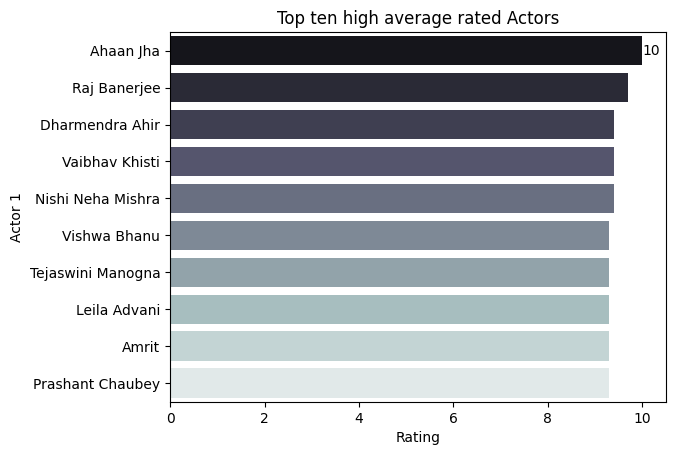

In [31]:
# plot top ten high average rating actors
actor1_rate = df.groupby('Actor 1').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(10)

ax = sns.barplot(data=actor1_rate, x='Rating', y='Actor 1', palette='bone')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated Actors')
plt.show()

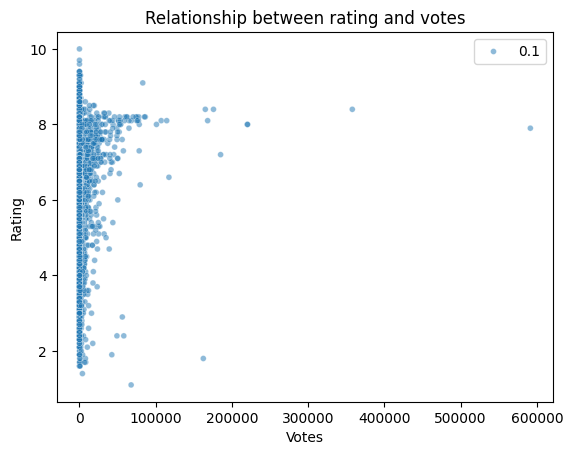

In [32]:
sns.scatterplot(data=df, x='Votes', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and votes')
plt.show()

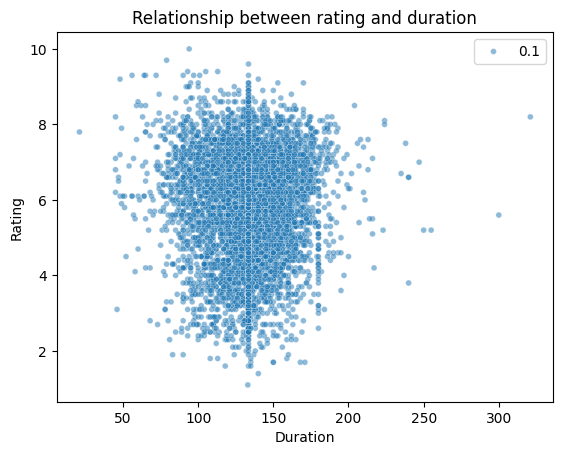

In [33]:
sns.scatterplot(data=df, x='Duration', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and duration')
plt.show()

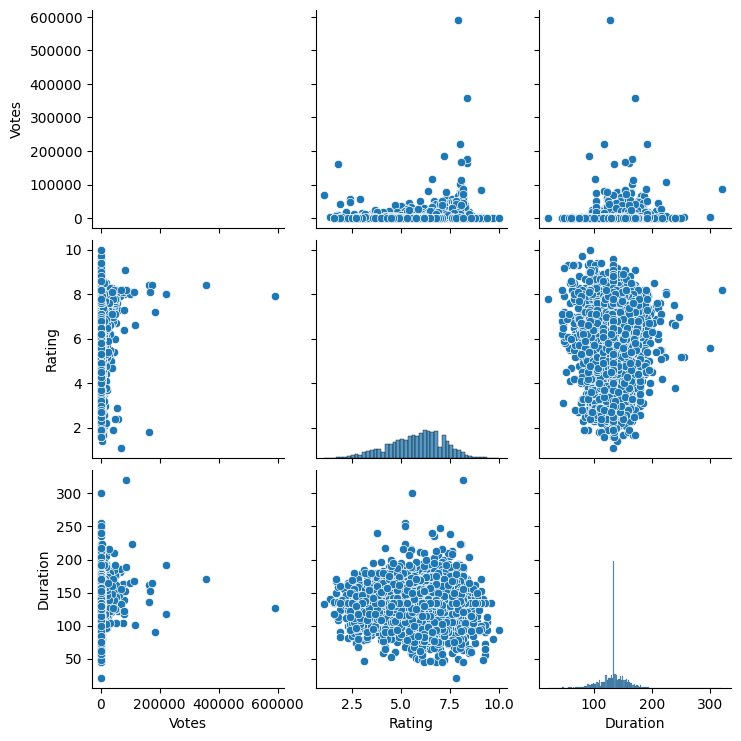

In [34]:
sns.pairplot(df[['Votes', 'Rating', 'Duration']]);

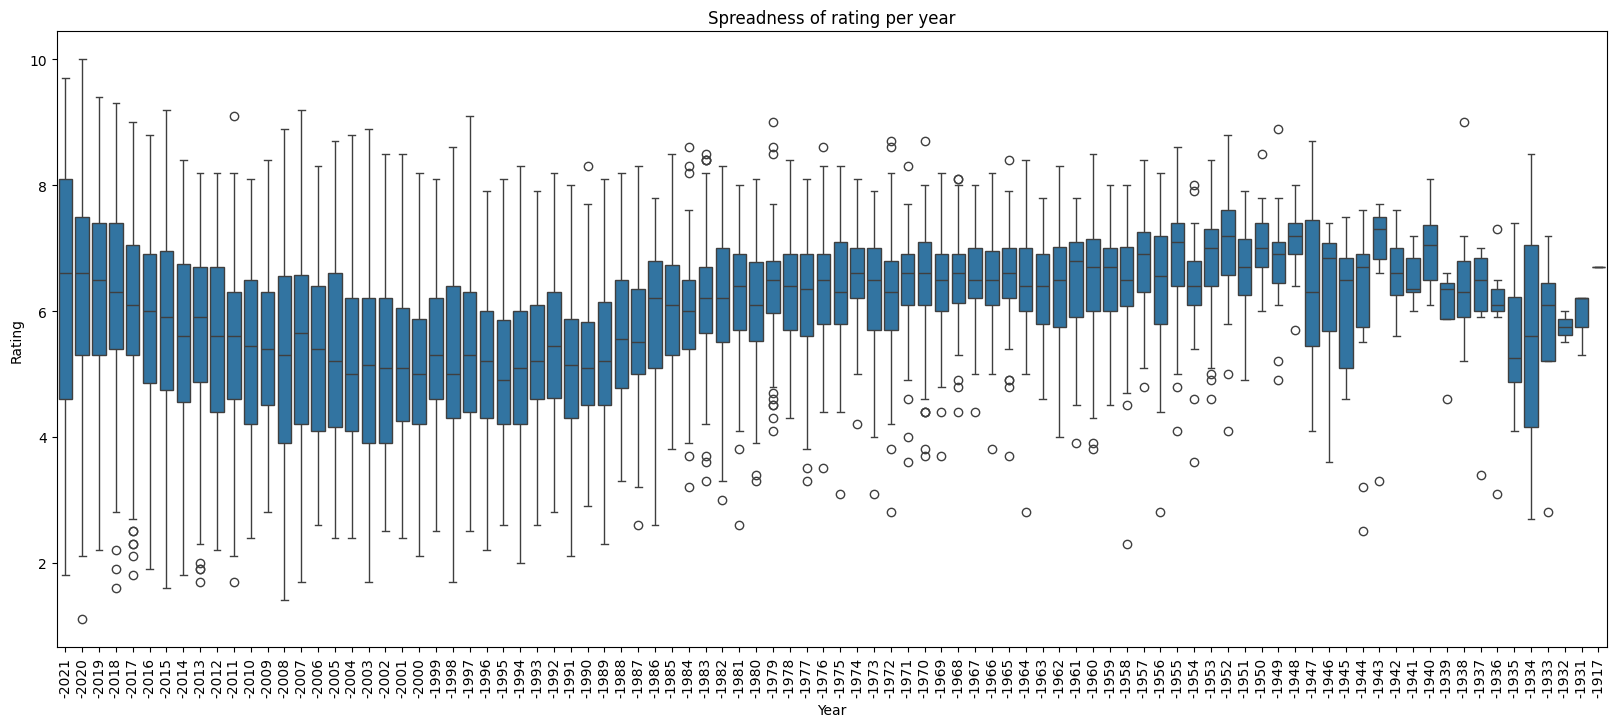

In [35]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='Year', y='Rating')
plt.title('Spreadness of rating per year')
plt.xticks(rotation=90)
plt.show()

In [36]:
df_update = df.drop(['Name'], axis=1)

In [37]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7551 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7551 non-null   int64  
 1   Duration  7551 non-null   float64
 2   Genre     7551 non-null   object 
 3   Rating    7551 non-null   float64
 4   Votes     7551 non-null   int64  
 5   Director  7551 non-null   object 
 6   Actor 1   7551 non-null   object 
 7   Actor 2   7551 non-null   object 
 8   Actor 3   7551 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 589.9+ KB


# Target Encoding

In [38]:
actor1_encoding_map = df_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = df_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = df_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = df_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = df_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [39]:
df_update['actor1_encoded'] = round(df_update['Actor 1'].map(actor1_encoding_map['Rating']),1)
df_update['actor2_encoded'] = round(df_update['Actor 2'].map(actor2_encoding_map['Rating']),1)
df_update['actor3_encoded'] = round(df_update['Actor 3'].map(actor3_encoding_map['Rating']),1)
df_update['director_encoded'] = round(df_update['Director'].map(director_encoding_map['Rating']),1)
df_update['genre_encoded'] = round(df_update['Genre'].map(genre_encoding_map['Rating']),1)

In [40]:
df_update.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
df_update.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,-2019,109.0,7.0,8,6.8,7.0,7.0,7.0,6.3
3,-2019,110.0,4.4,35,5.4,4.4,4.4,4.4,5.7
5,-1997,147.0,4.7,827,4.8,5.8,5.8,5.4,6.2
6,-2005,142.0,7.4,1086,5.3,6.0,6.5,7.5,6.8
8,-2012,82.0,5.6,326,5.6,5.9,5.6,5.6,5.5


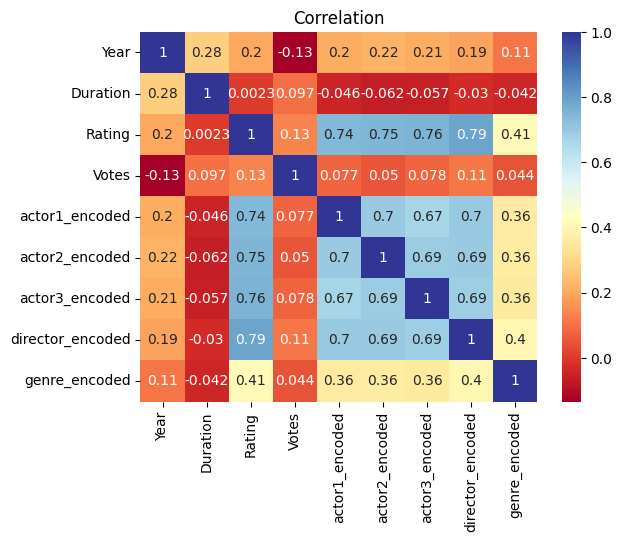

In [41]:
sns.heatmap(df_update.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

In [42]:
X = df_update.drop('Rating', axis=1)
y = df_update['Rating']

X.head()

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,-2019,109.0,8,6.8,7.0,7.0,7.0,6.3
3,-2019,110.0,35,5.4,4.4,4.4,4.4,5.7
5,-1997,147.0,827,4.8,5.8,5.8,5.4,6.2
6,-2005,142.0,1086,5.3,6.0,6.5,7.5,6.8
8,-2012,82.0,326,5.6,5.9,5.6,5.6,5.5


In [43]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print('Shape of training features: ', X_train.shape)
print('Shape of training target: ', y_train.shape)
print('Shape of testing features: ', X_test.shape)
print('Shape of testing target: ', y_test.shape)

Shape of training features:  (6040, 8)
Shape of training target:  (6040,)
Shape of testing features:  (1511, 8)
Shape of testing target:  (1511,)


# **Model Construction and Evaluation **

**Linear Regression**

In [45]:
# Initiate the model and fit into the training data
LR = LinearRegression()
LR.fit(X_train, y_train)

# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

Coefficient of determination:  0.7587989090932701


In [46]:
# Evaluate the model performance on the test data
y_pred_LR = LR.predict(X_test)

print('R^2: ', r2_score(y_test, y_pred_LR))
print('MAE: ',mean_absolute_error(y_test, y_pred_LR))
print('MSE: ', mean_squared_error(y_test, y_pred_LR))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_LR)))

R^2:  0.7672358459183446
MAE:  0.49960999859695715
MSE:  0.4563036430192837
RMSE:  0.6755025114825879


In [47]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_LR.ravel(),
                        'residual': y_test - y_pred_LR}
                      )
results.head()

,actual,predicted,residual
8339,10.0,11.054868,-1.054868
707,6.1,5.440014,0.659986
14422,5.0,5.532624,-0.532624
5745,3.8,3.123687,0.676313
39,4.1,4.293064,-0.193064


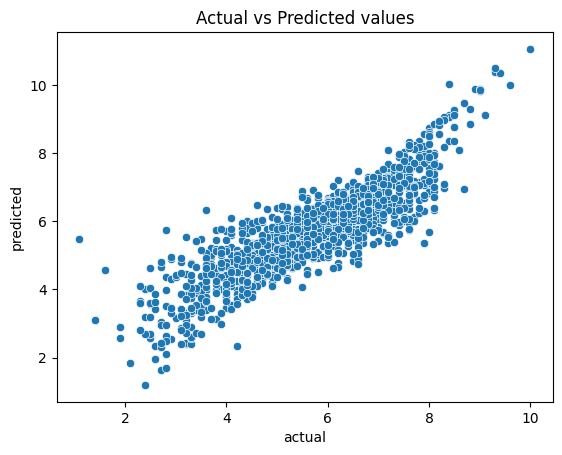

In [48]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x=results['actual'], y=results['predicted'])
plt.title('Actual vs Predicted values')
plt.show()

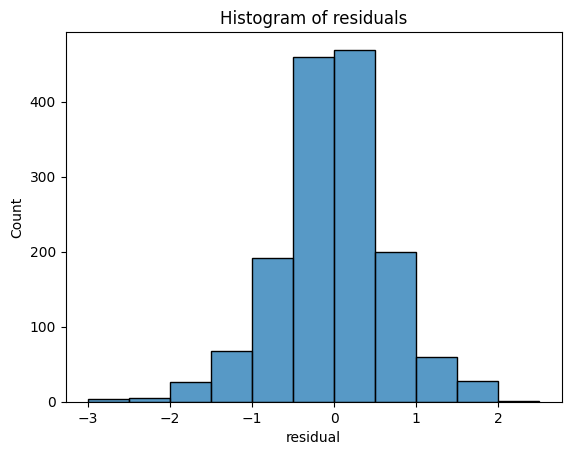

In [49]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-3,3,0.5))
plt.title('Histogram of residuals')
plt.show()

In [50]:
# Calculate residual mean
results['residual'].mean()

-0.013013726427334891

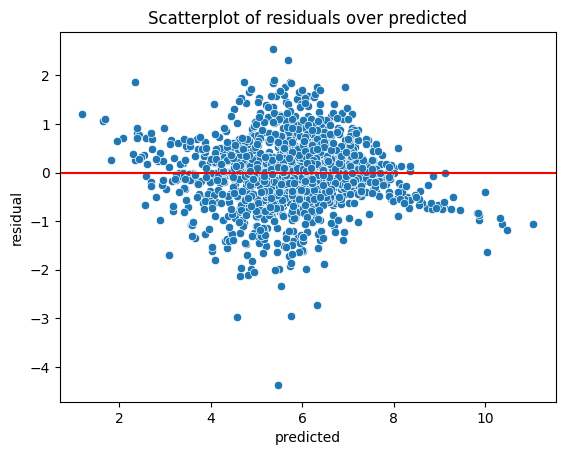

In [51]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

In [52]:
# Output the model's coefficients
coefficients = pd.DataFrame(LR.coef_, index=X.columns).T
coefficients

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
0,-0.000976,0.002956,0.000005,0.253999,0.282403,0.323033,0.412855,0.120326


**Linear Regression and Cross Validation**

In [53]:
LR_cv = LinearRegression()

k = 5 # Number of folds
cv = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(LR_cv, X, y, cv=cv, scoring='r2')

print("R^2 scores:", scores)
print("Mean R^2:", scores.mean())
print("Standard Deviation of R^2:", scores.std())

R^2 scores: [0.76723585 0.74051703 0.76002505 0.76994826 0.75812405]
Mean R^2: 0.7591700473555955
Standard Deviation of R^2: 0.010305214503422404


#### Ridge Regression

In [54]:
# Create a Ridge regression model
RR = Ridge()
# Define the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
# Create a grid search object
grid_search_RR = GridSearchCV(RR, param_grid, cv=5, scoring='r2')
# Fit the grid search to your data
grid_search_RR.fit(X_train, y_train)

grid_search_RR.best_params_

{'alpha': 10}

In [55]:
y_pred_RR = grid_search_RR.predict(X_test)

print('R^2: ', r2_score(y_test, y_pred_RR))
print('MAE: ',mean_absolute_error(y_test, y_pred_RR))
print('MSE: ', mean_squared_error(y_test, y_pred_RR))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_RR)))

R^2:  0.7672504923346399
MAE:  0.4995708173767182
MSE:  0.4562749306381221
RMSE:  0.6754812585395112


**Decision Tree**

In [56]:
# Create a Decision tree regression model
tree = DecisionTreeRegressor(random_state=0)
# Define the hyperparameter grid
param_grid = {'max_depth': [None, 10, 20, 30]}
# Create a grid search object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='r2')
# Fit the grid search to your data
grid_search_tree.fit(X_train, y_train)

grid_search_tree.best_params_

{'max_depth': 10}

In [57]:
y_pred_tree = grid_search_tree.predict(X_test)

print('R^2: ', r2_score(y_test, y_pred_tree))
print('MAE: ',mean_absolute_error(y_test, y_pred_tree))
print('MSE: ', mean_squared_error(y_test, y_pred_tree))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_tree)))

R^2:  0.7509346544451982
MAE:  0.4854759456241192
MSE:  0.4882599942199164
RMSE:  0.6987560334050192


**Random Forest**

In [58]:
# Create a Random Forest Regressor model
RF = RandomForestRegressor(random_state=0)
param_grid = {'min_samples_leaf': [1, 3, 5]}
grid_search_RF = GridSearchCV(RF, param_grid, cv=5, scoring='r2')
# Fit the grid search to the data
grid_search_RF.fit(X_train, y_train)

grid_search_RF.best_params_

{'min_samples_leaf': 1}

In [59]:
y_pred_RF = grid_search_RF.predict(X_test)

print('R^2: ', r2_score(y_test, y_pred_RF))
print('MAE: ',mean_absolute_error(y_test, y_pred_RF))
print('MSE: ', mean_squared_error(y_test, y_pred_RF))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_RF)))

R^2:  0.8181019131670371
MAE:  0.40829781601588344
MSE:  0.35658737921906003
RMSE:  0.5971493776426967


## Conclusion

* The years 1948, 1940 and 1950 had high average movie ratings.
* The trend of number of movie release per year has increased from 1917 to 2020.
* The top high avearge rated genres are (History, Romance), (Documentary, History, Family) and (Documentary, Music)
* The top high avearge rated directors are Saif Ali Sayeed, Sriram Raja and Bobby Kumar.
* The top high avearge rated actors are Ahaan jha, Raj Banerjee and Dharmendra Ahir.
* Movie rating and movie votes are not highly correlated.
* There is no correlation between movie rating and movie duration.
* The linear regression model resluts in R^2 of `0.758` on test data.
* The linear regression model after cross validation resluts in R^2 of `0.76`.
* The decision tree model resluts in R^2 of `0.70` on test data.
* The random forest regressor model resluts in R^2 of `0.79` on test data.